# Generate 2D Data for Introductory Tutorial
> Created Aug. 2024 for the FSU Course: *Machine Learning in Physics* H. B. Prosper<br>
<!-- 
<img src="./perceptron.png" align="left" width="400px"/> The output $y$ and the 
<br clear="left"/>
 -->
## Tips

  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode. **Markdown** is the typesetting language used in jupyter notebooks.
  * In a markdown cell, double tap the mouse or glide pad (on your laptop) to go to edit mode. 
  * Shift + return to execute a cell (including markdown cells).
  * If the equations don't typeset, try double tapping the cell again, and re-execute it.

## Import modules 

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as st

# standard plotting module
import matplotlib as mp
import matplotlib.pyplot as plt

# make plots appear inline
%matplotlib inline

# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')

# set usetex = False if Latex is not available on your system
mp.rc('text', usetex=False)

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd = np.random.RandomState(seed)

## Generate data

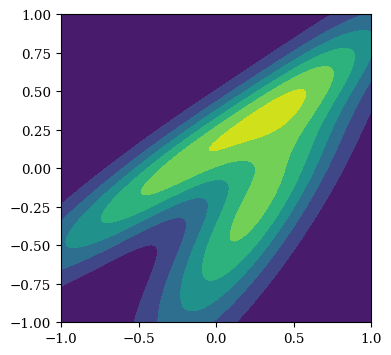

In [33]:
FGSIZE = (4, 4)
XMIN = -1
XMAX =  1

YMIN = -1
YMAX =  1
STEP = 0.01

XMEAN1 =  0.25
YMEAN1 = -0.25

XMEAN2 = -0.10
YMEAN2 =  0.10

rv1 = st.multivariate_normal(mean=[XMEAN1, YMEAN1], 
                            cov=[[0.20, 0.24], 
                                 [0.24, 0.40]])
x, y = np.mgrid[XMIN:XMAX+STEP:STEP, YMIN:YMAX+STEP:STEP]
pos = np.dstack((x, y))


rv2 = st.multivariate_normal(mean=[XMEAN2, YMEAN2], 
                            cov=[[0.60, 0.40], 
                                 [0.40, 0.30]])

fig = plt.figure(figsize=FGSIZE)
ax  = fig.add_subplot(111)
ax.contourf(x, y, rv1.pdf(pos)+rv2.pdf(pos))
plt.show()

In [34]:
T1 =  140
d1= rv1.rvs(T1)

T2 = 2000 - T1
d2= rv2.rvs(T2)
d1.shape, T1/T2

((140, 2), 0.07526881720430108)

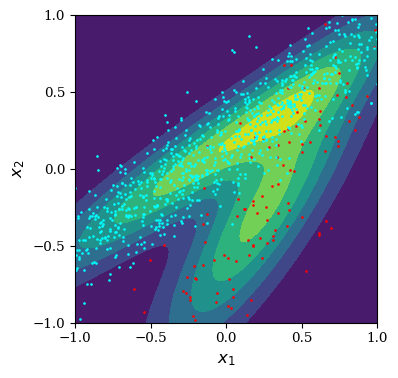

In [35]:
fig = plt.figure(figsize=(4.2, 4))

ax  = fig.add_subplot(111)

tickmarks = [-1.0, -0.5, 0.0, 0.5, 1.0]

ax.set_xlim(XMIN, XMAX)
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_xticks(tickmarks)

ax.set_ylim(YMIN, YMAX)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_yticks(tickmarks)

ax.contourf(x, y, rv1.pdf(pos)+rv2.pdf(pos))
xp, yp = d1[:1000,0], d1[:1000,1]
ax.scatter(xp, yp, s=0.8, color='red')

xp, yp = d2[:1000,0], d2[:1000,1]
ax.scatter(xp, yp, s=0.8, color='cyan');

fig.tight_layout()

plt.savefig('two2dnormals1K.png')
plt.show()

In [36]:
ones = np.ones(T1)[:, np.newaxis]
zeros= np.zeros(T2)[:, np.newaxis]
dd1 = np.hstack([d1,ones])
dd2 = np.hstack([d2,zeros])

In [37]:
dd = np.vstack([dd1, dd2])
dd[:5]

array([[-0.23670703, -0.83311337,  1.        ],
       [ 0.50428797,  0.15860457,  1.        ],
       [ 0.1495837 , -0.56281522,  1.        ],
       [ 0.1793674 , -0.4970347 ,  1.        ],
       [-0.20660516, -0.98003947,  1.        ]])

In [38]:
np.random.shuffle(dd)
dd[:25]

array([[-0.70950845, -0.33836849,  0.        ],
       [ 0.01827745,  0.29627061,  0.        ],
       [ 0.66520993,  0.62073878,  0.        ],
       [-0.5907367 , -0.27395598,  0.        ],
       [-0.7179855 , -0.27823557,  0.        ],
       [ 1.11885407,  0.75140271,  0.        ],
       [ 0.84850792,  0.77833139,  0.        ],
       [-1.1780009 , -0.57168527,  0.        ],
       [-0.39243463, -0.11134055,  0.        ],
       [-0.09404178, -0.00729299,  0.        ],
       [-1.09670973, -0.58996502,  0.        ],
       [-0.15857383, -0.25430573,  0.        ],
       [-0.70408243,  0.02589687,  0.        ],
       [-0.9596213 , -0.27929641,  0.        ],
       [-0.63930761, -0.30203384,  0.        ],
       [-0.71112828, -0.26246683,  0.        ],
       [-0.40347645, -0.12606085,  0.        ],
       [ 0.21822532,  0.23867352,  0.        ],
       [-0.07122963, -0.16600415,  0.        ],
       [ 0.05124714, -0.14970342,  0.        ],
       [-0.50246716, -0.33452571,  0.   

In [39]:
df = pd.DataFrame(dd, columns=['x1', 'x2', 'target'])
df[:10]

,x1,x2,target
0,-0.709508,-0.338368,0.0
1,0.018277,0.296271,0.0
2,0.665210,0.620739,0.0
3,-0.590737,-0.273956,0.0
4,-0.717986,-0.278236,0.0
5,1.118854,0.751403,0.0
6,0.848508,0.778331,0.0
7,-1.178001,-0.571685,0.0
8,-0.392435,-0.111341,0.0
9,-0.094042,-0.007293,0.0


In [40]:
df.to_csv('../data/normals_data.csv', index=False)

In [47]:
dd.T[:2].T

(2000, 2)

In [48]:
df = pd.DataFrame(dd.T[:2].T, columns=['x1', 'x2'])
df[:10]

,x1,x2
0,-0.709508,-0.338368
1,0.018277,0.296271
2,0.665210,0.620739
3,-0.590737,-0.273956
4,-0.717986,-0.278236
5,1.118854,0.751403
6,0.848508,0.778331
7,-1.178001,-0.571685
8,-0.392435,-0.111341
9,-0.094042,-0.007293


In [49]:
df.to_csv('../data/gauss2data.csv', index=False)